# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

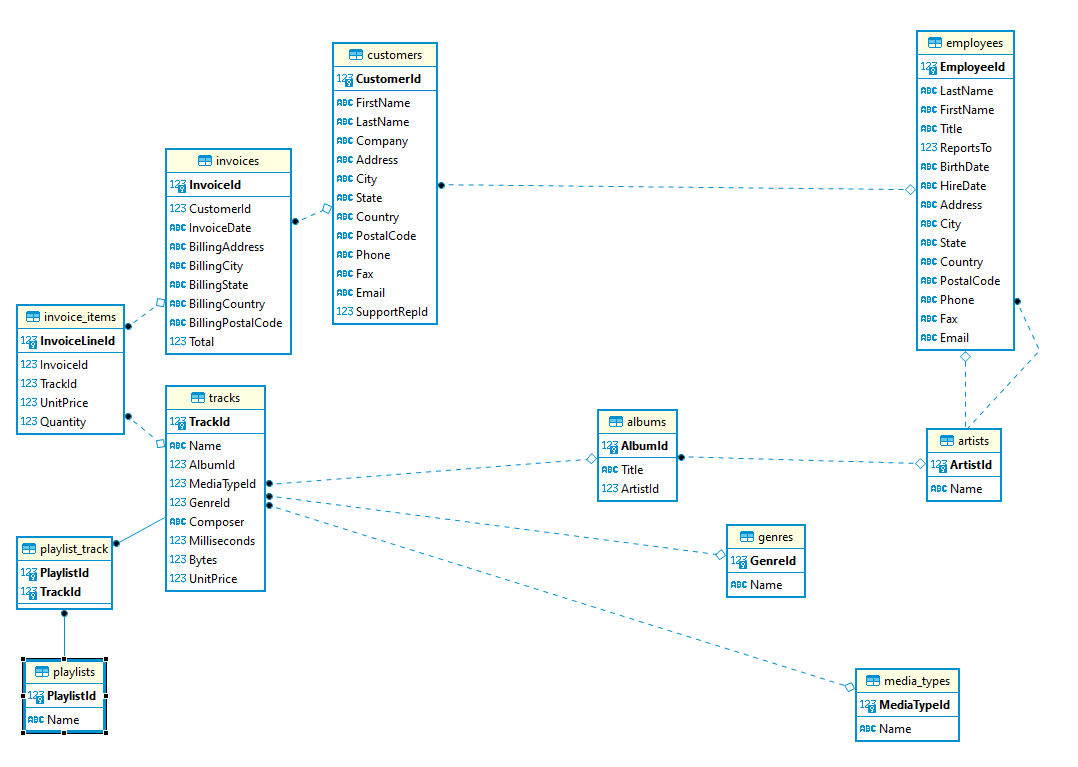

In [48]:
from IPython.display import Image
Image("IMG/ERdiagram.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [1]:
import os
import sqlite3
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

In [4]:
sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [5]:
# requête de départ
query = """
    SELECT e.firstname || ' ' || e.lastname AS 'Employee', Title AS 'Role',
           e.EmployeeId AS 'Id',ReportsTo as 'ReportsTo'
    FROM employees e;
"""

In [6]:
results = pd.read_sql_query(query, conn)
results

,Employee,Role,Id,ReportsTo
0,Andrew Adams,General Manager,1,NaN
1,Nancy Edwards,Sales Manager,2,1.0
2,Jane Peacock,Sales Support Agent,3,2.0
3,Margaret Park,Sales Support Agent,4,2.0
4,Steve Johnson,Sales Support Agent,5,2.0
5,Michael Mitchell,IT Manager,6,1.0
6,Robert King,IT Staff,7,6.0
7,Laura Callahan,IT Staff,8,6.0


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [7]:
# requête de départ
query2 = """
 SELECT a.artistId as 'ArtistId', 
         a.Name as 'Nom', 
         COUNT(a2.Title ) as 'nmb albums'
  FROM artists a 
  JOIN albums a2 ON a.ArtistId = a2.ArtistId 
  GROUP BY a.ArtistId , a.Name 
  ORDER BY a.Name 
  LIMIT 20
"""

In [8]:
results = pd.read_sql_query(query2, conn)
results

,ArtistId,Nom,nmb albums
0,1,AC/DC,2
1,230,Aaron Copland & London Symphony Orchestra,1
2,202,Aaron Goldberg,1
3,214,Academy of St. Martin in the Fields & Sir Nevi...,1
4,215,Academy of St. Martin in the Fields Chamber En...,1
5,222,"Academy of St. Martin in the Fields, John Birc...",1
6,257,"Academy of St. Martin in the Fields, Sir Nevil...",1
7,2,Accept,2
8,260,Adrian Leaper & Doreen de Feis,1
9,3,Aerosmith,1


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [23]:

query3 = """
SELECT
        ar.Name as 'Artistes',
        al.Title as 'Titre album',
        COUNT(t.TrackId) as 'Nmb de pistes',
        SUM(t.Milliseconds)/60000. as 'Durée Totale Min',
        SUM(t.UnitPrice) as 'Prix Total'
     FROM albums al
        INNER JOIN artists ar ON al.ArtistId = ar.ArtistId 
        LEFT JOIN tracks t ON al.AlbumId = t.AlbumId
    GROUP BY Title
    ORDER BY Artistes, Title
    LIMIT 15;
"""

In [24]:
results = pd.read_sql_query(query3, conn)
results

,Artistes,Titre album,Nmb de pistes,Durée Totale Min,Prix Total
0,AC/DC,For Those About To Rock We Salute You,10,40.006917,9.90
1,AC/DC,Let There Be Rock,8,40.887650,7.92
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",1,3.301067,0.99
3,Aaron Goldberg,Worlds,1,4.448933,0.99
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,2,7.753350,1.98
5,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration,1,5.816183,0.99
6,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others",1,4.315400,0.99
7,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4,1,3.765550,0.99
8,Accept,Balls to the Wall,1,5.709367,0.99
9,Accept,Restless and Wild,3,14.301467,2.97


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [25]:
query4 = """
SELECT  
    p.Name as 'Nom Playlist',
    p.PlaylistId as 'ID Playlist',
    COUNT(pt.TrackId) as 'Nmb de pistes',
    SUM(t.Milliseconds)/60000 as 'Durée Totale Min',
    SUM(t.UnitPrice) as 'Prix Total'
FROM playlists p
    LEFT JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId 
    LEFT JOIN tracks t ON pt.TrackId = t.TrackId 
GROUP BY p.PlaylistId, p.Name
ORDER BY p.Name;
"""

In [26]:
results = pd.read_sql_query(query4, conn)
results

,Nom Playlist,ID Playlist,Nmb de pistes,Durée Totale Min,Prix Total
0,90’s Music,5,1477,6645.0,1462.23
1,Audiobooks,4,0,NaN,NaN
2,Audiobooks,6,0,NaN,NaN
3,Brazilian Music,11,39,158.0,38.61
4,Classical,12,75,362.0,74.25
5,Classical 101 - Deep Cuts,13,25,112.0,24.75
6,Classical 101 - Next Steps,14,25,126.0,24.75
7,Classical 101 - The Basics,15,25,123.0,24.75
8,Grunge,16,15,68.0,14.85
9,Heavy Metal Classic,17,26,136.0,25.74


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [27]:
query5 = """
SELECT 
    g.Name as 'Genre',
    g.GenreId as 'ID Genre',
    COUNT(t.TrackId) as 'Nmb de pistes',
    SUM(t.Milliseconds)/60000 as 'Durée Totale Min',
    SUM(t.UnitPrice) as 'Coût total',
    AVG(t.UnitPrice) as 'Coût moyen'
FROM genres g
    LEFT JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.GenreId, g.Name
ORDER BY g.Name;
"""

In [28]:
results = pd.read_sql_query(query5, conn)
results

,Genre,ID Genre,Nmb de pistes,Durée Totale Min,Coût total,Coût moyen
0,Alternative,23,40,176,39.60,0.99
1,Alternative & Punk,4,332,1296,328.68,0.99
2,Blues,6,81,364,80.19,0.99
3,Bossa Nova,11,15,54,14.85,0.99
4,Classical,24,74,362,73.26,0.99
5,Comedy,22,17,449,33.83,1.99
6,Drama,21,64,2746,127.36,1.99
7,Easy Listening,12,24,75,23.76,0.99
8,Electronica/Dance,15,30,151,29.70,0.99
9,Heavy Metal,13,28,138,27.72,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [29]:
query6 = """
SELECT 
    t.Name as 'Nom de piste',
    al.Title as 'Album',
    ar.Name as "Artiste de l'album",
    t.Composer as 'Compositeur',
    mt.Name as 'Nom du média',
    (t.Milliseconds)/1000 AS 'Durée en Secondes',
    t.UnitPrice as "Prix unitaire"
FROM tracks t
    LEFT JOIN albums al ON t.AlbumId = al.AlbumId 
    LEFT JOIN artists ar ON al.ArtistId = ar.ArtistId 
    LEFT JOIN genres g ON t.GenreId = g.GenreId 
    LEFT JOIN media_types mt ON t.MediaTypeId = mt.MediaTypeId
WHERE g.Name = 'Science Fiction';
"""

In [30]:
results = pd.read_sql_query(query6, conn)
results

,Nom de piste,Album,Artiste de l'album,Compositeur,Nom du média,Durée en Secondes,Prix unitaire
0,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
1,A Measure of Salvation,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2563,1.99
2,Hero,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2713,1.99
3,Unfinished Business,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
4,The Passage,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2623,1.99
5,The Eye of Jupiter,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2618,1.99
6,Rapture,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
7,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
8,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2626,1.99
9,A Day In the Life,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2620,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [31]:
query7 = """
SELECT DISTINCT 
    c.CustomerId as 'ID client', 
    c.LastName as 'Nom',
    c.FirstName as 'Prénom',
    c.Email as 'Email',
    c.Country as 'Pays' 
FROM customers c
    LEFT JOIN invoices i ON c.CustomerId = i.CustomerId 
    LEFT JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId 
    LEFT JOIN tracks t ON ii.TrackId = t.TrackId 
    LEFT JOIN genres g ON t.GenreId = g.GenreId
WHERE g.Name = 'World'
ORDER BY c.CustomerId;
"""

In [32]:
results = pd.read_sql_query(query7, conn)
results

,ID client,Nom,Prénom,Email,Pays
0,4,Hansen,Bjørn,bjorn.hansen@yahoo.no,Norway
1,12,Almeida,Roberto,roberto.almeida@riotur.gov.br,Brazil
2,14,Philips,Mark,mphilips12@shaw.ca,Canada
3,15,Peterson,Jennifer,jenniferp@rogers.ca,Canada
4,31,Silk,Martha,marthasilk@gmail.com,Canada
5,32,Mitchell,Aaron,aaronmitchell@yahoo.ca,Canada
6,34,Fernandes,João,jfernandes@yahoo.pt,Portugal
7,51,Johansson,Joakim,joakim.johansson@yahoo.se,Sweden
8,54,Murray,Steve,steve.murray@yahoo.uk,United Kingdom


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [33]:
query8 = """
SELECT
    a.Name as 'Artiste',
    COUNT(t.TrackId) as 'Nmb de Piste'
FROM artists a
    LEFT JOIN albums al ON a.ArtistId = al.ArtistId
    LEFT JOIN tracks t ON al.AlbumId = t.AlbumId
    LEFT JOIN genres g ON t.GenreId = g.GenreId
WHERE g.Name = 'Rock'
GROUP BY a.Name
ORDER BY COUNT(t.TrackId) DESC
LIMIT 15;
"""

In [34]:
results = pd.read_sql_query(query8, conn)
results

,Artiste,Nmb de Piste
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [32]:
query9 = """
SELECT 
    customers.CustomerID as Id, 
    customers.Firstname as Prénom,
    customers.Lastname as Nom,
    customers.Country as Pays,
    SUM(invoices.Total) AS Dépense
FROM customers
    INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY customers.CustomerId
ORDER BY SUM(invoices.Total) DESC
LIMIT 5
"""

In [33]:
results = pd.read_sql_query(query9, conn)
results

,Id,Prénom,Nom,Pays,Dépense
0,6,Helena,Holý,Czech Republic,49.62
1,26,Richard,Cunningham,USA,47.62
2,57,Luis,Rojas,Chile,46.62
3,45,Ladislav,Kovács,Hungary,45.62
4,46,Hugh,O'Reilly,Ireland,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [44]:
query10 = """
SELECT
    i.InvoiceDate as "Date d'achat",
    t.Name AS 'Titre',
    a.Title AS 'Album',
    a2.Name AS 'Artiste',
    g.Name AS 'Genre',
    mt.Name AS 'Type de Média'
FROM customers c
    LEFT JOIN invoices i ON	c.CustomerId = i.CustomerId
    LEFT JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    LEFT JOIN tracks t ON ii.TrackId = t.TrackId
    LEFT JOIN albums a ON a.AlbumId = t.AlbumId
    LEFT JOIN genres g ON g.GenreId = t.GenreId
    LEFT JOIN media_types mt ON mt.MediaTypeId = t.MediaTypeId
    LEFT JOIN artists a2 ON a2.ArtistId = a.ArtistId
WHERE c.LastName = 'Cunningham' AND c.FirstName = 'Richard'
ORDER BY i.InvoiceDate
"""

In [45]:
results = pd.read_sql_query(query10, conn)
results

,Date d'achat,Titre,Album,Artiste,Genre,Type de Média
0,2009-11-07 00:00:00,Radio Free Aurope,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file
1,2009-11-07 00:00:00,Perfect Circle,The Best Of R.E.M.: The IRS Years,R.E.M.,Alternative & Punk,MPEG audio file
2,2010-02-09 00:00:00,Drowning Man,War,U2,Rock,MPEG audio file
3,2010-02-09 00:00:00,Two Hearts Beat As One,War,U2,Rock,MPEG audio file
4,2010-02-09 00:00:00,Surrender,War,U2,Rock,MPEG audio file
5,2010-02-09 00:00:00,Zooropa,Zooropa,U2,Rock,MPEG audio file
6,2010-05-14 00:00:00,Sozinho (Caêdrum 'n' Bass),Sozinho Remix Ao Vivo,Caetano Veloso,Latin,MPEG audio file
7,2010-05-14 00:00:00,Samba De Orly,Minha Historia,Chico Buarque,Latin,MPEG audio file
8,2010-05-14 00:00:00,O Que Será (À Flor Da Terra),Minha Historia,Chico Buarque,Latin,MPEG audio file
9,2010-05-14 00:00:00,Minha Historia,Minha Historia,Chico Buarque,Latin,MPEG audio file


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [46]:
query11 = """

 
"""

In [ ]:
results = pd.read_sql_query(query11, conn)
results

Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [40]:
query12 = """
SELECT
    i.BillingCountry AS 'Pays',
    SUM(ii.Quantity) AS 'NMB de titres vendus',
    ROUND((SUM(ii.Quantity)*100.0/(SELECT SUM(ii.Quantity) FROM invoice_items ii)), 2) AS '%'
FROM invoices i
    LEFT JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
GROUP BY BillingCountry
ORDER BY SUM(ii.Quantity) DESC;
"""

In [41]:
results = pd.read_sql_query(query12, conn)
results

,Pays,NMB de titres vendus,%
0,USA,494,22.05
1,Canada,304,13.57
2,France,190,8.48
3,Brazil,190,8.48
4,Germany,152,6.79
5,United Kingdom,114,5.09
6,Portugal,76,3.39
7,Czech Republic,76,3.39
8,India,74,3.30
9,Sweden,38,1.70
